In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from utils.training_utils import plot_variable_distribution, plot_boxplot

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Leitura da base raw

In [2]:
df_raw = pd.read_csv(os.path.join('..', 'data', 'raw', 'raw_dataset.csv'), sep=";")

print(df_raw.shape)
df_raw.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_raw = df_raw.drop_duplicates()
df_raw.shape

(41176, 21)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [5]:
(df_raw.shape[0] - df_raw.isnull().sum()) / (df_raw.shape[0])

age               1.0
job               1.0
marital           1.0
education         1.0
default           1.0
housing           1.0
loan              1.0
contact           1.0
month             1.0
day_of_week       1.0
duration          1.0
campaign          1.0
pdays             1.0
previous          1.0
poutcome          1.0
emp.var.rate      1.0
cons.price.idx    1.0
cons.conf.idx     1.0
euribor3m         1.0
nr.employed       1.0
y                 1.0
dtype: float64

In [6]:
df_raw.columns[df_raw.isnull().all()]

Index([], dtype='object')

### Informações dos clientes

Neste bloco serão analisadas as variáveis que descrevem o perfil sociodemográfico e a situação financeira dos clientes, tais como idade, tipo de ocupação, estado civil, nível educacional, bem como a presença de inadimplência, financiamento habitacional e empréstimo pessoal.

O perfil dos clientes contactados apresenta uma idade média de 40 anos. Em relação à ocupação, observa-se uma predominância das profissões administrador, trabalhador braçal (blue-collar) e técnico (technician), que, juntas, representam aproximadamente 64% da amostra. Dado o grande número de categorias ocupacionais distintas, pode ser interessante reagrupar as profissões em categorias mais amplas, como empregados, não empregados e desconhecido, a fim de facilitar a análise e reduzir a sparsidade da variável. Além disso, a taxa de resposta positiva à campanha (y = 1) varia entre as ocupações — por exemplo, estudantes (31,4%) e aposentados (25,2%) apresentaram proporções superiores à média geral, indicando o grupo de "não empregados" como possível segmento com maior propensão de engajamento.

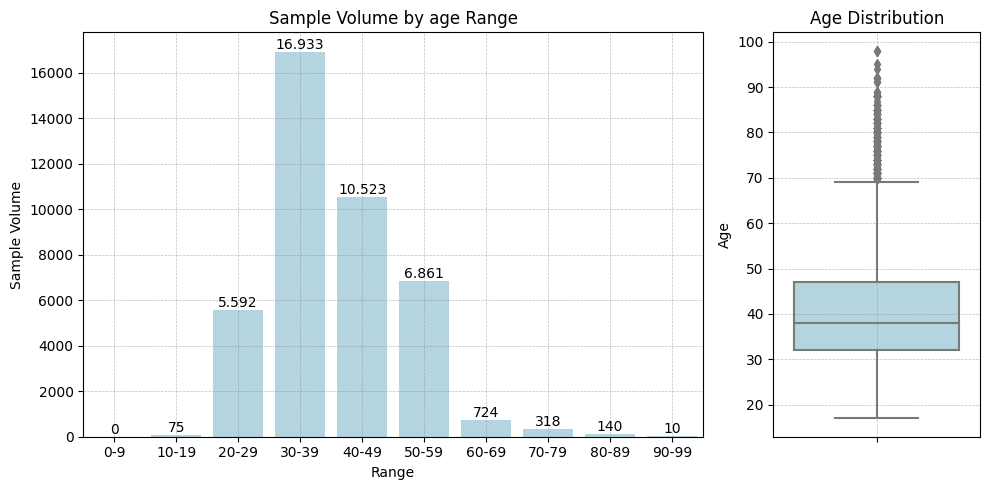

In [7]:
plot_variable_distribution(df_raw, 'age')

In [8]:
df_raw['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

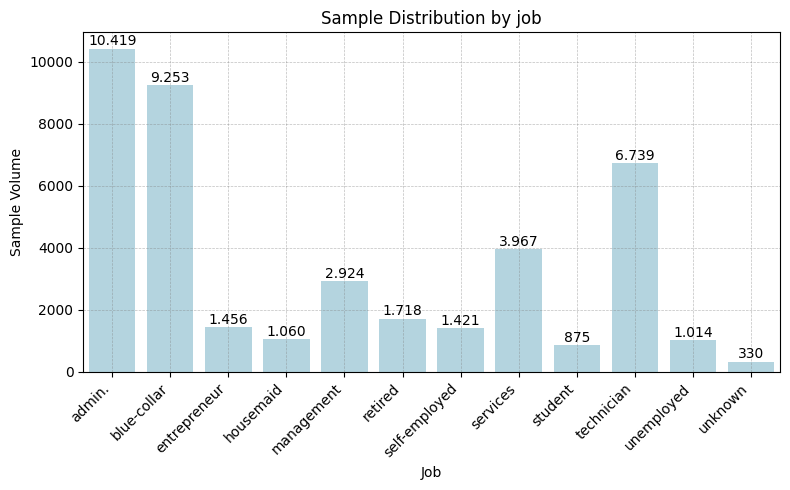

In [9]:
plot_variable_distribution(df_raw, 'job')  

In [10]:
df_raw.groupby('job')['y'].value_counts(normalize=True).unstack()

y,no,yes
job,,
admin.,0.870333,0.129667
blue-collar,0.931049,0.068951
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747381,0.252619
self-employed,0.895144,0.104856
services,0.918578,0.081422
student,0.685714,0.314286


Quanto ao estado civil, a maioria dos clientes são casados, com menor proporção de indivíduos divorciados ou com estado civil desconhecido. Observa-se que clientes solteiros apresentam uma maior taxa de resposta positiva à campanha (y = 1, 14,0%), seguidos por aqueles com estado civil desconhecido (15,0%).

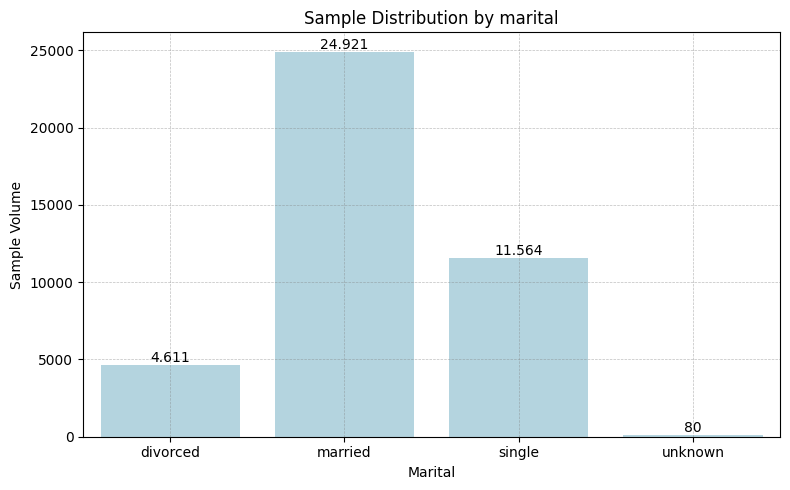

In [11]:
plot_variable_distribution(df_raw, 'marital')  

In [12]:
df_raw.groupby('marital')['y'].value_counts(normalize=True).unstack()

y,no,yes
marital,,
divorced,0.896769,0.103231
married,0.898439,0.101561
single,0.859910,0.140090
unknown,0.850000,0.150000


Para escolaridade, o grupo analfabeto (illiterate), que, embora represente uma fração muito pequena da base, possui uma taxa de conversão alta quanto comparada aos demais grupos (22,2%). Contudo, dado o pequeno número de observações nessa categoria, esse resultado deve ser interpretado com cautela. 

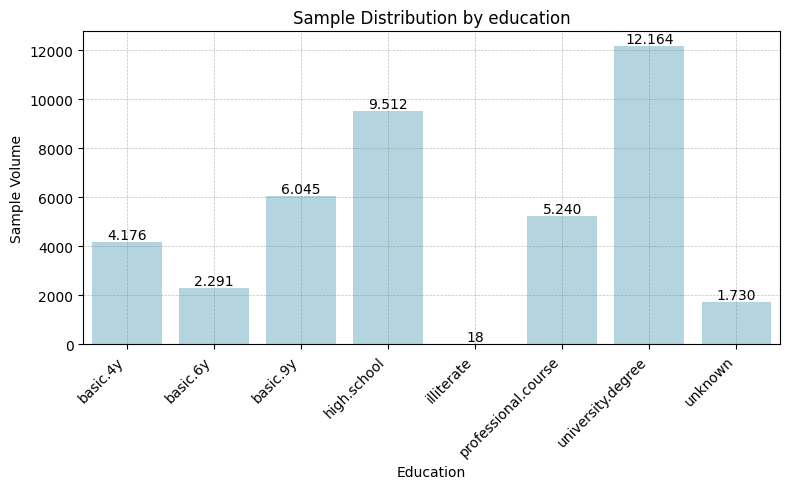

In [13]:
plot_variable_distribution(df_raw, 'education')  

In [14]:
df_raw.groupby('education')['y'].value_counts(normalize=True).unstack()

y,no,yes
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917940,0.082060
basic.9y,0.921754,0.078246
high.school,0.891611,0.108389
illiterate,0.777778,0.222222
professional.course,0.886450,0.113550
university.degree,0.862792,0.137208
unknown,0.854913,0.145087


A variável de inadimplência (*default*) pode comprometer o poder de generalização do modelo, uma vez que todos os clientes identificados como inadimplentes (default = yes) não foram convertidos pela campanha (y = no). Embora esse grupo contenha apenas três observações, o padrão observado pode induzir o modelo a aprender uma associação espúria. 

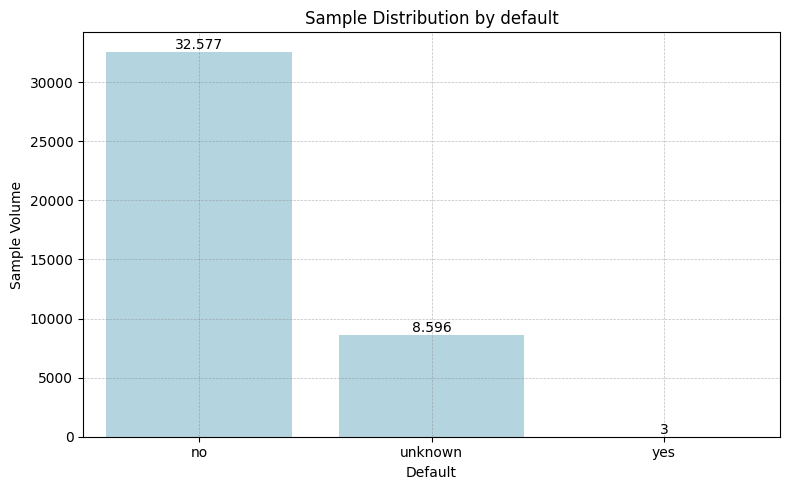

In [15]:
plot_variable_distribution(df_raw, 'default')  

In [16]:
df_raw[df_raw['default']=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,66,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,40-49
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,133,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,40-49
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,111,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,30-39


In [17]:
df_raw[df_raw['euribor3m'] > 5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
23997,44,admin.,married,high.school,no,yes,no,telephone,oct,fri,159,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,no,40-49
23998,42,admin.,married,high.school,no,yes,yes,telephone,oct,fri,103,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,yes,40-49
23999,39,blue-collar,married,basic.9y,no,no,no,telephone,oct,fri,270,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,yes,30-39
24000,56,unknown,married,unknown,no,no,no,telephone,oct,fri,235,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,yes,50-59
24001,30,entrepreneur,married,university.degree,no,no,no,telephone,oct,fri,223,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,yes,30-39
24002,43,technician,single,professional.course,no,no,no,telephone,oct,fri,147,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,no,40-49
24003,27,self-employed,single,university.degree,no,no,no,telephone,oct,fri,24,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,no,20-29
24004,46,admin.,divorced,high.school,no,yes,no,telephone,oct,fri,3253,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,no,40-49
24005,42,self-employed,married,basic.4y,no,no,no,telephone,oct,fri,478,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,yes,40-49


In [18]:
df_raw.groupby('default')['y'].value_counts(normalize=True).unstack()

y,no,yes
default,,
no,0.871197,0.128803
unknown,0.948464,0.051536
yes,1.000000,NaN


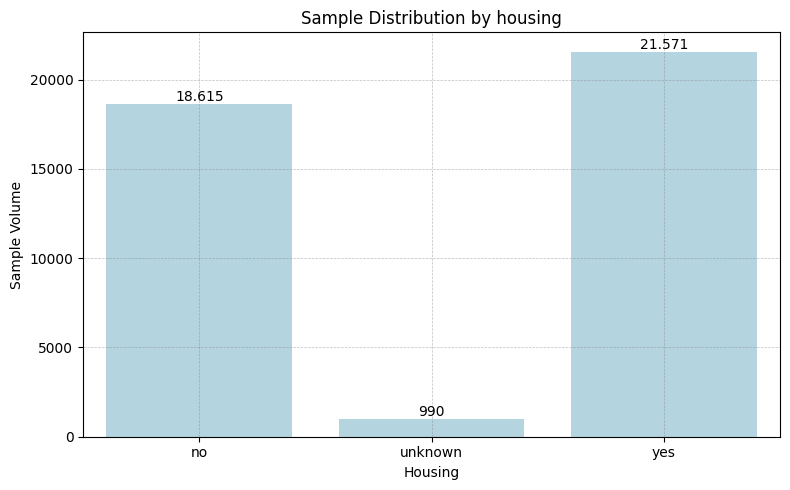

In [19]:
plot_variable_distribution(df_raw, 'housing')

In [20]:
df_raw.groupby('housing')['y'].value_counts(normalize=True).unstack()

y,no,yes
housing,,
no,0.891217,0.108783
unknown,0.891919,0.108081
yes,0.883779,0.116221


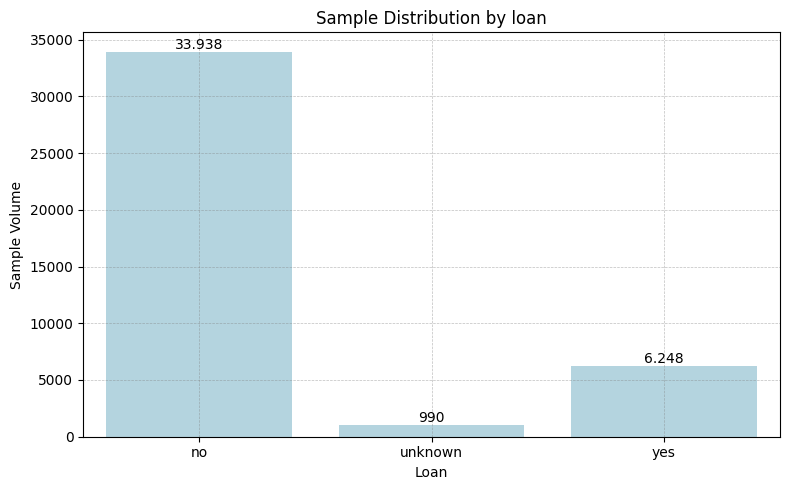

In [21]:
plot_variable_distribution(df_raw, 'loan')

In [22]:
df_raw.groupby('loan')['y'].value_counts(normalize=True).unstack()

y,no,yes
loan,,
no,0.886587,0.113413
unknown,0.891919,0.108081
yes,0.890685,0.109315


### Dados da última campanha

Neste bloco será avaliado informações sobre a campanha de marketing realizada. 

Os resultados positivos da campanha são superiores para celular (14,7%), o que pode sugerir canal mais efetivo dado a flexibilidade em horários que o aparelho proporciona.

A variável mês (month), que representa o mês do último contato com os clientes, apresenta variações importantes nas taxas de conversão (y = yes). Os meses com maior proporção de respostas positivas foram março (50,5%), dezembro (48,9%), outubro (43,9%) e setembro (44,9%). Esses meses parecem ter se destacado em termos de eficácia da campanha. Por outro lado, os meses de maio (6,4%), julho (9,0%), junho (10,5%) e agosto (10,6%) apresentaram taxas de conversão consideravelmente mais baixas. Esses resultados sugerem possivelmente fatores sazonais, contextos econômicos temporários ou até estratégias comerciais mais eficazes em determinados períodos.

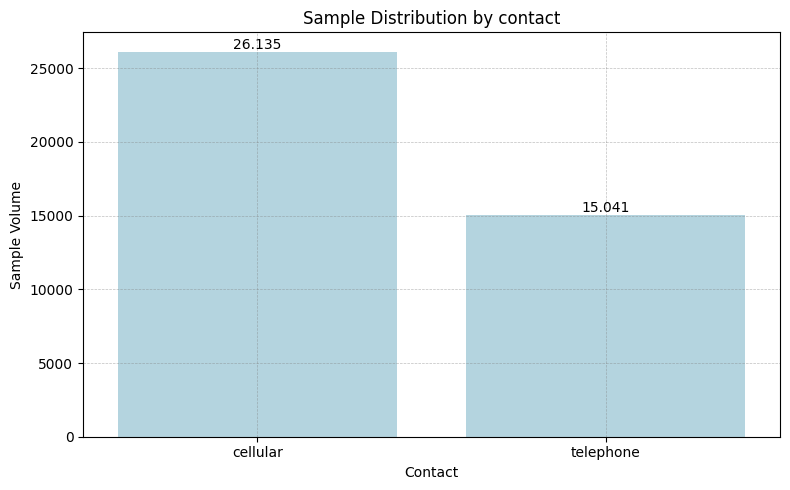

In [23]:
plot_variable_distribution(df_raw, 'contact')  

In [24]:
df_raw.groupby('contact')['y'].value_counts(normalize=True).unstack()

y,no,yes
contact,,
cellular,0.852611,0.147389
telephone,0.947676,0.052324


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


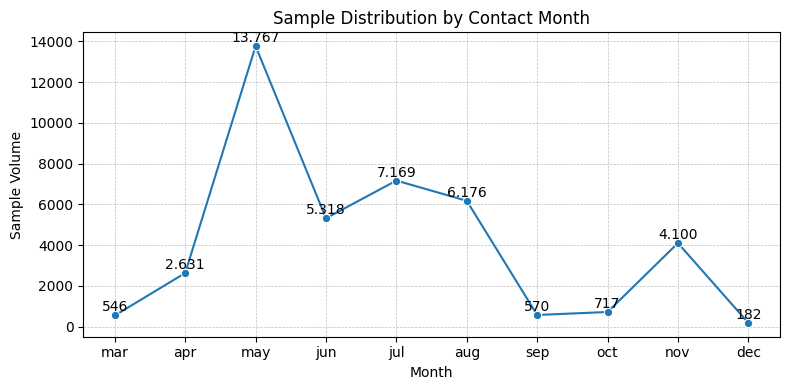

In [25]:
plot_variable_distribution(df_raw, 'month')  

In [26]:
month_order = ['mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df_raw.groupby('month')['y'].value_counts(normalize=True).unstack().reindex(month_order)

y,no,yes
month,,
mar,0.494505,0.505495
apr,0.795135,0.204865
may,0.935643,0.064357
jun,0.894885,0.105115
jul,0.909611,0.090389
aug,0.893944,0.106056
sep,0.550877,0.449123
oct,0.560669,0.439331
nov,0.898537,0.101463


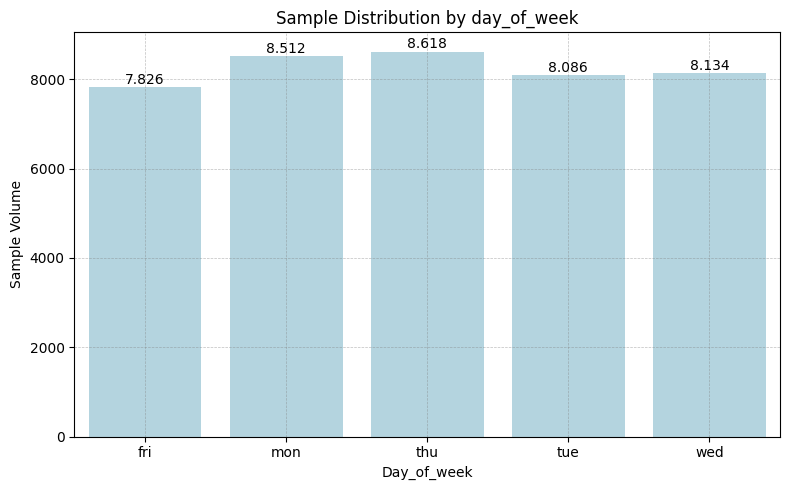

In [27]:
plot_variable_distribution(df_raw, 'day_of_week')

In [28]:
df_raw.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()

y,no,yes
day_of_week,,
fri,0.891899,0.108101
mon,0.900493,0.099507
thu,0.878858,0.121142
tue,0.882142,0.117858
wed,0.883329,0.116671


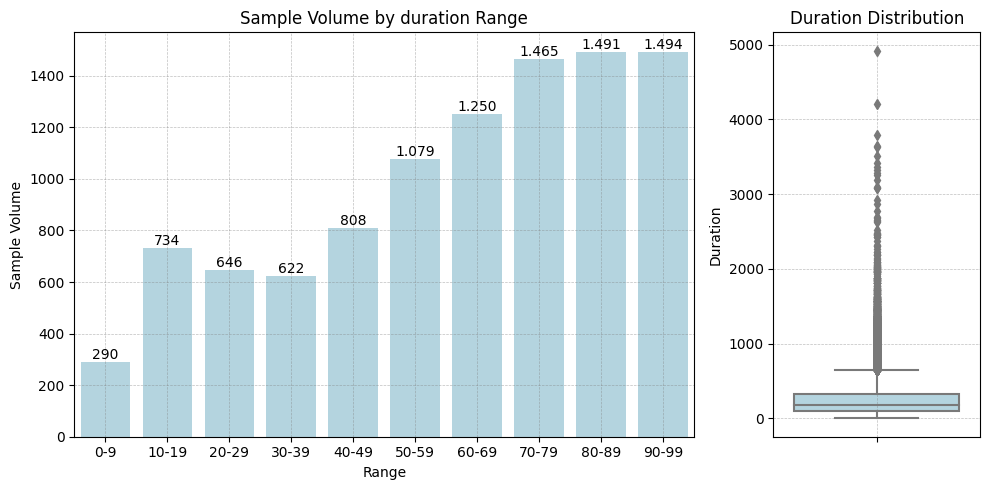

In [29]:
plot_variable_distribution(df_raw, 'duration')  

### Outros atributos

Ainda sobre informações sobre as campanhas de marketig, a variável campaign, que indica o número de vezes que um cliente foi contatado durante a campanha atual, sugere que aumentar excessivamente o número de contatos não está associado a maior taxa de sucesso, na verdade, a tendência oposta é observada. 

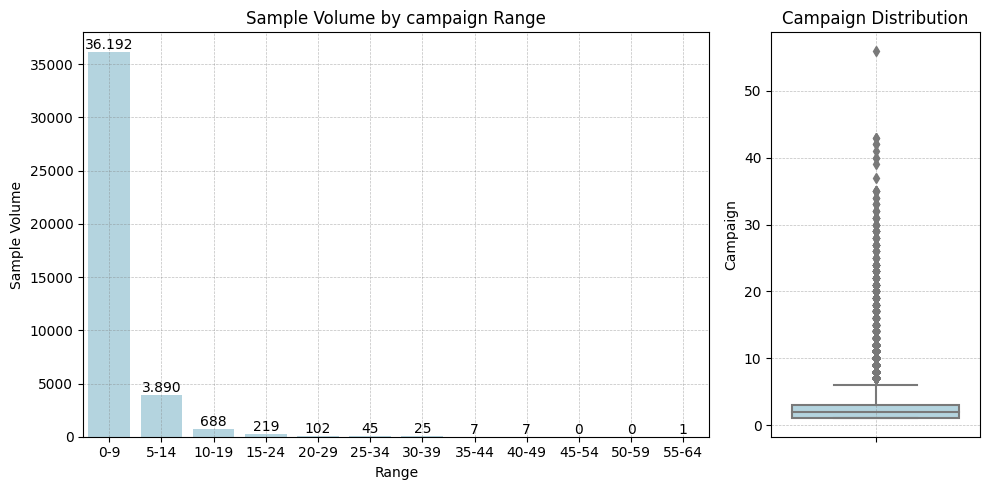

In [30]:
plot_variable_distribution(df_raw, 'campaign', bins=range(0, 61, 5))  

Clientes não contatados anteriormente (pdays = 999) responderam positivamente em apenas 9,3% dos casos.

In [31]:
import pandas as pd

# Função para agrupar valores de 'pdays'
def agrupar_pdays(valor):
    if valor == 999:
        return '999 (não contatado)'
    elif valor <= 4:
        return '0-4'
    elif valor <= 9:
        return '5-9'
    elif valor <= 14:
        return '10-14'
    elif valor <= 19:
        return '15-19'
    elif valor <= 24:
        return '20-24'
    elif valor <= 29:
        return '25-29'
    else:
        return '30+'

df_raw['pdays_group'] = df_raw['pdays'].apply(agrupar_pdays)

categoria_ordenada = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+', '999 (não contatado)']
df_raw['pdays_group'] = pd.Categorical(df_raw['pdays_group'], categories=categoria_ordenada, ordered=True)

df_raw.groupby(['pdays_group', 'y']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack().fillna(0)


y,no,yes
pdays_group,,
0-4,0.368741,0.631259
5-9,0.325000,0.675000
10-14,0.432990,0.567010
15-19,0.452830,0.547170
20-24,0.333333,0.666667
25-29,0.000000,1.000000
30+,0.000000,0.000000
999 (não contatado),0.907415,0.092585


A análise mostra que entre os clientes sem histórico de contato prévio, apenas 8,8% responderam positivamente à campanha. Por outro lado, entre aqueles que já haviam sido contatados, a taxa de conversão foi significativamente maior, atingindo 26,6%.

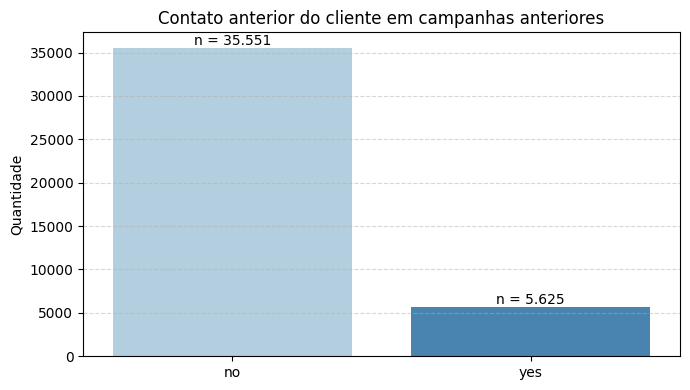

In [32]:
df_raw['previous_contact'] = df_raw['previous'].apply(lambda x: 'no' if x == 0 else 'yes')

plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df_raw, x='previous_contact', 
                   palette='Blues', 
                   order=['no', 
                          'yes'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'n = {int(height):,}'.replace(',', '.'),
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=10
    )


plt.title('Contato anterior do cliente em campanhas anteriores')
plt.ylabel('Quantidade')
plt.xlabel('')
plt.tight_layout()
plt.grid(True, linestyle='--', axis='y', alpha=0.5)
plt.show()


In [33]:
df_raw.groupby('previous_contact')['y'].value_counts(normalize=True).unstack()

y,no,yes
previous_contact,,
no,0.911676,0.088324
yes,0.733511,0.266489


Resultados para poutcome que indicam um histórico de sucesso em interações anteriores, forte indicativo de maior propensão à conversão (65,1%).

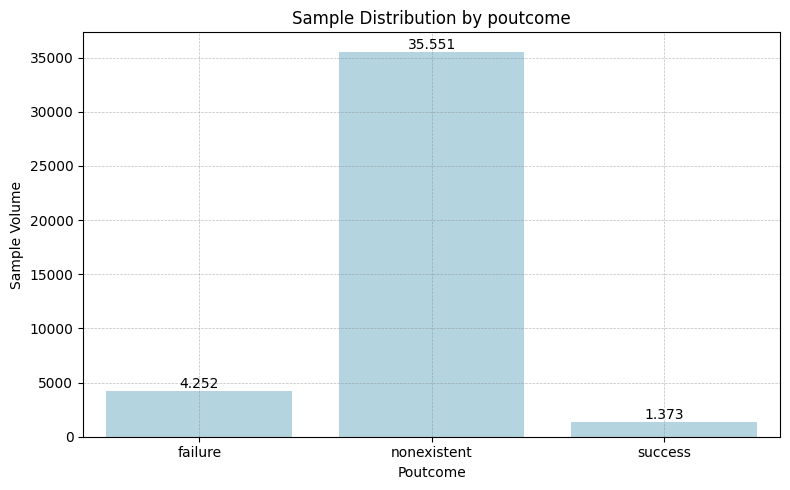

In [34]:
plot_variable_distribution(df_raw, 'poutcome')  

In [35]:
df_raw.groupby('poutcome')['y'].value_counts(normalize=True).unstack()

y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911676,0.088324
success,0.348871,0.651129


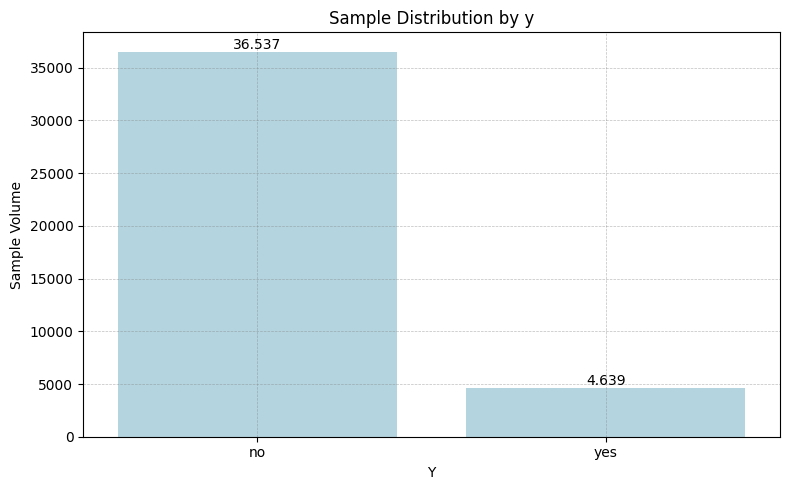

In [36]:
plot_variable_distribution(df_raw, 'y')

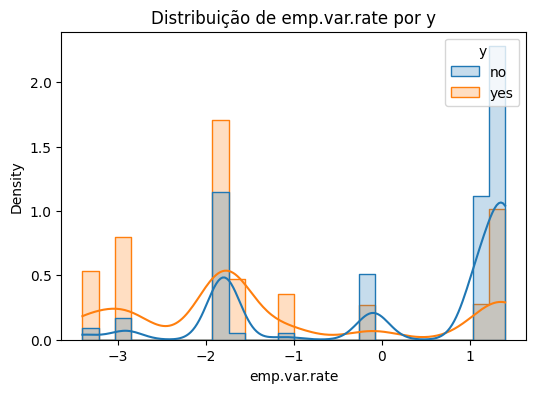

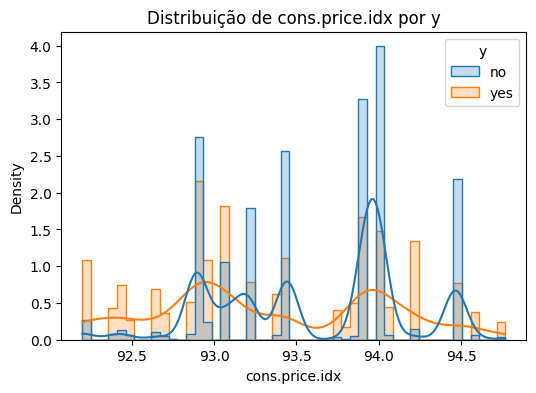

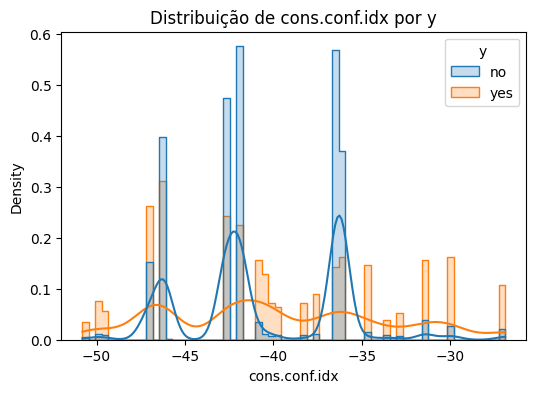

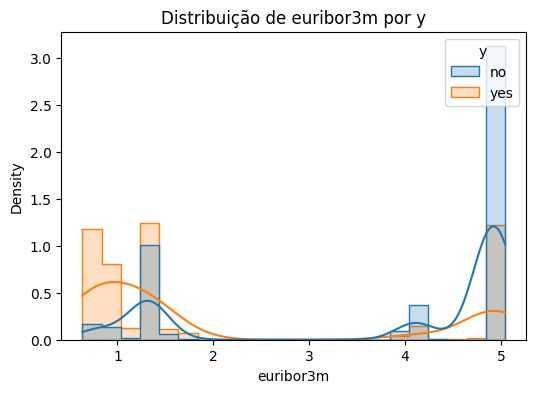

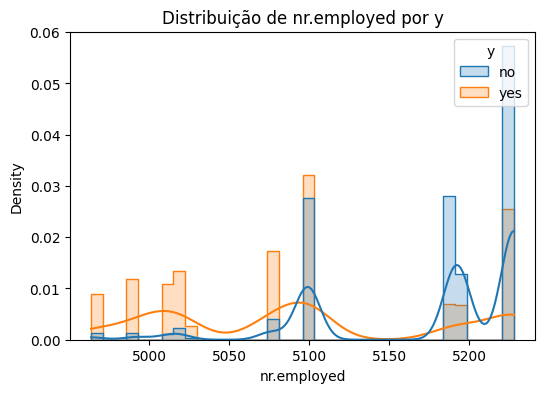

In [37]:
features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_raw, x=feature, hue='y', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribuição de {feature} por y')
    plt.show()


### Hipóteses:
- **emp.var.rate**: sucesso da campanha parece maior em momentos de desaceleração do mercado de trabalho;
- **cons.price.idx**:  conversão é ligeiramente mais comum em contextos de índice de preços mais baixos;
- **cons.conf.idx**: público parece mais propenso a aceitar a campanha em momentos de pessimismo econômico;
- **euribor3m**:  adesão à campanha é mais comum em cenários de juros baixos;
- **nr.employed**: em períodos de menor emprego formal, os clientes parecem mais abertos à campanha.

In [38]:
vars_corr = [
    'age', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

corr_matrix = df_raw[vars_corr].corr(method='pearson')

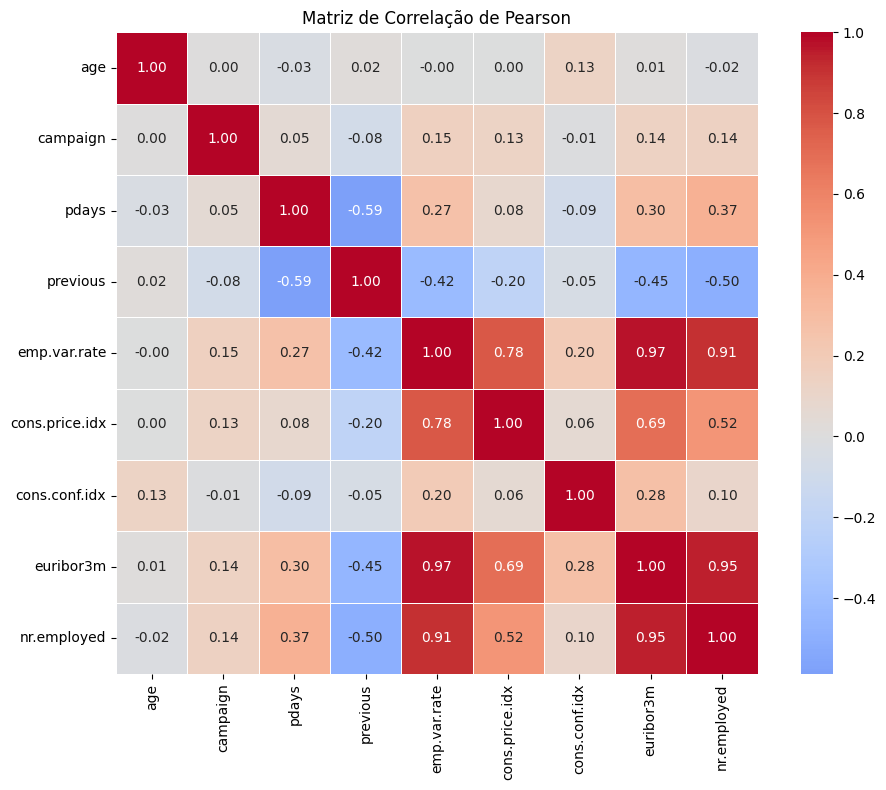

In [39]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Matriz de Correlação de Pearson')
plt.tight_layout()

plt.show()